# Introducing

- Nama  : I Made Dhanan Pradipta
- Batch : 10

## Problem

para penikmat game pokemon pasti akan memilih jenis pokemon yang kuat dan juga memiliki stat yang mumpuni, sehingga lebih mudah utk menamatkan game tanpa mengalami kesulitan,
namun kadang pemain baru sering kesusahan dalam memilih pokemon starter yang akan dipakai di dalam game pokemon, starter pokemon itu tersendiri adalah pokemon yang diberikan oleh game
secara gratis utk memulai petualangan, terdapat 3 buah pilihan pokemon, tetapi hanya 1 buah pokemon yang dapat menemani kita utk menjelajahi dunia pokemon. karena terbatasnya pilihan ini, maka player
harus berpikir dengan baik dalam memilih salah satu ketiganya, karena sangat berpengaruh ke end game. maka dari itu diperlukan info tentang ketiga pokemon ini.

## Objektif

hasil yang diberikan adalah perbandingan dari ketiga pokemon dalam hal element dari pokemon itu tersendiri, kekuatan dari element dan juga kelemahan yang dimiliki, sehingga bisa mengukur tingkat
kekuatan dari pokemon starter. seperti yang diketahui jika elemen dari pokemon kuat terhadap elemen lainya maka kekuatan akan double

contoh : Pokemon FIRE mempunyai kekuatan double melawan Pokemon GRASS, namun kekuatan berkurang setengah ketika bertemu Pokemon WATER 

dan pokemon yang diukur adalah 

Charmander (Fire) - Charmeleon (Fire) - Charizard (Fire, Flying) 

Squirtle (Water) - Wartortle (Water) - Blastoise (Water)

Bulbasaur (Grass, poison) - Ivysaur (Grass, poison) - Venusaur (Grass, poison)


NB : (hanya menghitung Generasi 1, dikarenakan setiap generasi starter pokemon yang berbeda-beda, dan tidak menyertakan legendary pokemon karena, legendary baru akan ditemui ketika post-game (source:bulbapedia))

### Data Loading

import library pandas dan numpy yang akan digunakan pada kasus kali ini, dan juga loading data dari dataset yang sudah ditentukan yaitu Pokemon.csv

In [34]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

In [35]:
poke_df = pd.read_csv("dataset/Pokemon.csv") #read dataset dengan ekstensi csv

In [36]:
poke_df.head() #inspeksi data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [37]:
poke_df.info() #cek info dari dataframe utk melihat missing value dan type dari column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


- Setelah dicek, terdapat missing value di kolom Type 2

In [38]:
poke_df['Type 2'].unique() #cek value unik pada kolom Type 2

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [39]:
poke_df['Type 2'].value_counts() #cek jumlah masing-masing value

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

- setelah dicek kolom Type 2, nilai Nan pada kolom wajar, dan pada pokemon lumrah 
untuk memiliki 1 Type atau 2 Type, sehingga kolom Type 2 tidak perlu untuk dihapus atau diisi,
karena diperlukan utk mencapai output yang diinginkan

- terdapat kolom bernama # yang tidak memiliki fungsi apa-apa, sehingga tidak apa utk di hapus

In [40]:
poke_df.fillna('Not Have 2nd Type')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Not Have 2nd Type,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [41]:
poke_df.drop('#', axis=1, inplace=True) #hapus kolom #

In [42]:
poke_df.head() #cek lagi dataframe setelah menghapus kolom #

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### 2. Analysis

1. Langkah satu, yaitu mengecek status pokemon dengan melihat data-data dari dataframe, sehingga dapat gambaran pokemon dengan type element apa yang paling kuat

In [43]:
#grouping menggunakan kondisi generasi = 1 dan legendary = false

strongest_poke = poke_df[(poke_df['Generation'] == 1) & (poke_df['Legendary'] == False)].groupby(['Type 1']).mean()
            

In [44]:
strongest_poke.sort_values(by=['Total'], ascending=False) #mengurutkan pokemon dengan nilai Total terbesar ke terkecil

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Fire,473.461538,64.000000,87.769231,65.384615,90.692308,79.615385,86.000000,1.0,0.0
Psychic,458.875000,57.500000,52.625000,54.375000,106.375000,92.500000,95.500000,1.0,0.0
Ice,455.000000,65.000000,50.000000,35.000000,115.000000,95.000000,95.000000,1.0,0.0
Ghost,453.750000,48.750000,53.750000,53.750000,128.750000,65.000000,103.750000,1.0,0.0
Dragon,440.000000,64.333333,94.000000,68.333333,73.333333,73.333333,66.666667,1.0,0.0
Rock,440.000000,56.500000,87.500000,107.500000,61.500000,59.500000,67.500000,1.0,0.0
Water,431.419355,66.967742,74.193548,83.193548,69.354839,70.451613,67.258065,1.0,0.0
Electric,427.500000,50.000000,58.500000,62.125000,86.875000,71.250000,98.750000,1.0,0.0
Grass,426.000000,66.153846,72.923077,73.692308,90.538462,68.461538,54.230769,1.0,0.0


setelah dicek, type paling kuat dengan status gabungan ('Total'), yaitu type Fire
namun, ketika berhadapan dengan element lain apakah Fire tetap lebih kuat dari yang lain 

2. buat main dataframe dengan kondisi generasi = 1 dan legendary = false, df ini nantinya akan digunakan sampai akhir dari proses

In [45]:
gen_1 = poke_df[(poke_df['Generation'] == 1) & (poke_df['Legendary'] == False)] 
gen_1.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


##### Analisis - Charmander

ref type element : https://pokemondb.net/

pokemon yang pertama kita analisis adalah charmander dengan evolusinya charmeleon dan charizard sebagai evolusi terakhir
type 1 dari charmander, charmeleon, dan charizard adalah FIRE

sedangkan charizard memiliki Type 2 yaitu Flying

INFO :
Charmander & Charmeleon (FIRE)
- FIRE > GRASS, ICE, BUG, STEEL
- FIRE < WATER, GROUND, ROCK

Charizard (FIRE FLYING)
- FIRE FLYING > GRASS FIGHTING BUG ICE STEEL
- FIRE FLYING < ELECTRIC ICE ROCK GROUND WATER


<img src="charmander_evo.png" width="500" height="200">

In [46]:
#fire element calculate
fire_str = gen_1[gen_1['Type 1'].isin(['Grass', 'Ice', 'Bug', 'Steel']) | gen_1['Type 2'].isin(['Grass', 'Ice', 'Bug', 'Steel'])] # kalkulasi element FIRE KUAT melawan element GRASS, ICE, BUGS, STEEL
fire_weak = gen_1[gen_1['Type 1'].isin(['Water', 'Ground', 'Rock']) | gen_1['Type 2'].isin(['Water', 'Ground', 'Rock'])] #kalkulasi element FIRE LEMAH terhadap element WATER, GROUND, ROCK
fire_normal = 166 - (len(fire_str) + len(fire_weak)) #kalkulasi element yang NORMAL atau NETRAL terhadap elemen FIRE

#flying element calculate
flying_fire_str = gen_1[gen_1['Type 1'].isin(['Grass', 'Fighting', 'Bug', 'Ice', 'Steel']) | gen_1['Type 2'].isin(['Grass', 'Fighting', 'Bug', 'Ice', 'Steel'])] # kalkulasi dual element FIRE FLYING KUAT melawan element GRASS, FIGHTING, ICE, BUGS, STEEL
flying_fire_weak = gen_1[gen_1['Type 1'].isin(['Electric', 'Ice', 'Rock', 'Ground', 'Water']) | gen_1['Type 2'].isin(['Electric', 'Ice', 'Rock', 'Ground', 'Water'])] # kalkulasi dual element FIRE FLYING LEMAH terhadap element WATER, GROUND, ROCK, ICE, ELECTRIC
flying_fire_normal = 166 - (len(flying_fire_str) + len(flying_fire_weak)) #kalkulasi element yang NORMAL atau NETRAL terhadap elemen FIRE FLYING


buat dataframe yang khusus menampung data dari Charmander, Charmeleon dan Charizard

In [47]:
charmander_df = gen_1[gen_1['Name'].isin(['Charmander', 'Charmeleon', 'Charizard'])]

buat kolom Strong, Weak, Normal sesuai dengan kalkulasi yang sudah dilakukan di atas pada charmander_df 

- Kolom 'STRONG' = Elemen kuat terhadap Elemen lain
- Kolom 'WEAK' = Elemen lemah terhadap Elemen lain
- Kolom 'NORMAL' = Elemen netral terhadap Elemen lain

In [48]:
charmander_df['Strong'] = fire_str['Type 1'].value_counts().sum() # hitung value kuat dan input kedalam kolom Strong, utk Charizard sesuai dengan typenya FIRE FLYING
charmander_df['Strong'][charmander_df.Name == 'Charizard']  = flying_fire_str['Type 1'].value_counts().sum() 

charmander_df['Weak'] = fire_weak['Type 1'].value_counts().sum() # hitung value lemah dan input kedalam kolom Weak, utk Charizard sesuai dengan typenya FIRE FLYING
charmander_df['Weak'][charmander_df.Name == 'Charizard'] = flying_fire_weak['Type 1'].value_counts().sum()

charmander_df['Normal'] = fire_normal # hitung value netral dan input kedalam kolom Normal, utk Charizard sesuai dengan typenya FIRE FLYING
charmander_df['Normal'][charmander_df.Name == 'Charizard'] = flying_fire_normal

In [49]:
charmander_df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Strong,Weak,Normal
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,33,51,82
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,33,51,82
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,41,60,65


grouping dan aggregating dengan rumus mean, untuk mendapatkan nilai rata-rata dari Charmander, charmeleon, dan Charizard sehingga mudah utk dibandingkan dengan data lainyanya

In [50]:
final_charmander = charmander_df.groupby(['Type 1']).agg({'Total': 'mean',
                                                          'Strong': 'mean',
                                                          'Weak': 'mean',
                                                          'Normal': 'mean'})
final_charmander

,Total,Strong,Weak,Normal
Type 1,,,,
Fire,416.0,35.666667,54.0,76.333333


visualisasikan kedalam bar plot, sehingga data yang disajikan dapat mudah dimengerti

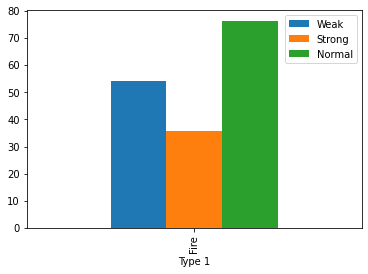

In [51]:
final_charmander[['Weak', 'Strong', 'Normal']].plot(kind='bar');

##### Kesimpulan

- Starter Pokemon Charmander dengan evolusi Charmeleon - Charizard paling banyak bersifat netral terhadap element dari pokemon lainya, tidak kuat ataupun tidak lemah 
- lebih banyak pokemon yang lebih kuat secara elemen terhadap Charmander dibandingkan yang lemah
- rata-rata ada 35 pokemon memiliki elemen yang lemah melawan elemen FIRE dan FIRE FLYING
- rata-rata ada 54 pokemon memiliki elemen yang kuat melawan elemen FIRE dan FIRE Flying
- rata-rata ada 76 pokemon memiliki elemen netral melawan elemen FIRE dan FIRE FLYING

##### 4. Analisis - Squirtle

pokemon yang kedua kita analisis adalah squirtle dengan evolusinya wartortle dan blastoise sebagai evolusi terakhir
ketiganya memiliki type hanya WATER

INFO :
Squirtle, Wartortle,Blastoise (Water)
- WATER > FIRE GROUND ROCK
- WATER < ELECTRIC GRASS DRAGON

<img src="squi_evo.png" width="500" height="200">

In [52]:
water_str = gen_1[gen_1['Type 1'].isin(['Fire', 'Ground', 'Rock']) | gen_1['Type 2'].isin(['Fire', 'Ground', 'Rock'])]
water_weak = gen_1[gen_1['Type 1'].isin(['Electric', 'Grass', 'Dragon']) | gen_1['Type 2'].isin(['Electric', 'Grass', 'Dragon'])]
water_normal = 166 - (len(water_str) + len(water_weak))

In [53]:
squirtle_df = gen_1[gen_1['Name'].isin(['Squirtle', 'Wartortle', 'Blastoise'])] #buat dataframe untuk menampung data dari squirtle
squirtle_df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [54]:
squirtle_df['Strong'] = water_str['Type 1'].value_counts().sum() #karena hanya 1 type pokemon, maka ketiganya disamakan dalam pembuatan kolom Strong, weak dan Normal
squirtle_df['Weak'] = water_weak['Type 1'].value_counts().sum()
squirtle_df['Normal'] = water_normal

In [55]:
squirtle_df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Strong,Weak,Normal
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,33,27,106
10,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,33,27,106
11,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,33,27,106


grouping dan aggregating dengan rumus mean, untuk mendapatkan nilai rata-rata dari Squirtle, Wartortle, Blastoise sehingga mudah utk dibandingkan dengan data lainyanya

In [56]:
final_squirtle = squirtle_df.groupby(['Type 1']).agg({'Total': 'mean',
                                                      'Strong': 'mean',
                                                      'Weak': 'mean',
                                                      'Normal': 'mean'})
final_squirtle

,Total,Strong,Weak,Normal
Type 1,,,,
Water,416.333333,33.0,27.0,106.0


visualisasikan kedalam bar plot, sehingga data yang disajikan dapat mudah dimengerti

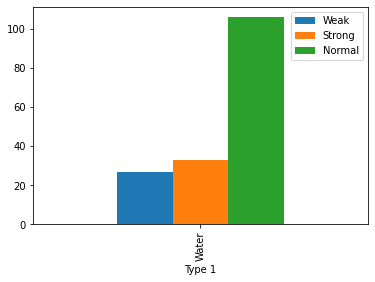

In [57]:
final_squirtle[['Weak', 'Strong', 'Normal']].plot(kind='bar');

##### Kesimpulan

- Starter Pokemon squirtle paling juga sama dengan chamander paling banya bersifat netral terhadap element dari pokemon lainya, tidak kuat ataupun tidak lemah 
- nilai strong sedikit lebih banyak dibandingkan nilai weak
- rata-rata ada 33 pokemon memiliki elemen yang lemah melawan elemen WATER
- rata-rata ada 27 pokemon memiliki elemen yang kuat melawan elemen WATER
- rata-rata ada 106 pokemon memiliki elemen netral melawan elemen WATER

##### 5. Analisis - Bulbasaur

pokemon yang kedua kita analisis adalah Bulbasaur dengan evolusinya Ivysaur dan Venusaur sebagai evolusi terakhir
ketiganya memiliki dual type GRASS POISON

INFO :
Bulbasaur, Ivysaur, Venusaur (Grass poison)
- GRASS POISON > WATER GROUND ROCK GRASS FAIRY
- GRASS POISON < FIRE ICE FLYING BUG PHYSIC

<img src="bulbasaur_evo.jpg" width="500" height="200">

In [58]:
#kalkulasi perhitungan strong, weak dan normal terhadap elemen GRASS POISON

grass_poison_str = gen_1[gen_1['Type 1'].isin(['Water', 'Ground', 'Rock', 'Grass', 'Fairy']) | gen_1['Type 2'].isin(['Water', 'Ground', 'Rock', 'Grass', 'Fairy'])] 
grass_poison_weak = gen_1[gen_1['Type 1'].isin(['Fire', 'Ice', 'Flying', 'Bug', 'Physic']) | gen_1['Type 2'].isin(['Fire', 'Ice', 'Flying', 'Bug', 'Physic'])]
grass_poison_normal = 166 - (len(grass_poison_str) + len(grass_poison_weak))


In [59]:
#buat df baru utk menampung hanya dari bulbasaur dan evolusinya

bulbasaur_df = gen_1[gen_1['Name'].isin(['Bulbasaur', 'Ivysaur', 'Venusaur'])]
bulbasaur_df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [60]:
bulbasaur_df['Strong'] = grass_poison_str['Type 1'].value_counts().sum()
bulbasaur_df['Weak'] = grass_poison_weak['Type 1'].value_counts().sum()
bulbasaur_df['Normal'] = grass_poison_normal

In [61]:
bulbasaur_df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Strong,Weak,Normal
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,71,46,49
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,71,46,49
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,71,46,49


In [62]:
#grouping dan aggregating untuk mendapatkan rata-rata dari bulbasaur dan evolusinya

final_bulbasaur = bulbasaur_df.groupby(['Type 1']).agg({'Total': 'mean',
                                                      'Strong': 'mean',
                                                      'Weak': 'mean',
                                                      'Normal': 'mean'})
final_bulbasaur

,Total,Strong,Weak,Normal
Type 1,,,,
Grass,416.0,71.0,46.0,49.0


visualisasikan kedalam bar plot, sehingga data yang disajikan dapat mudah dimengerti

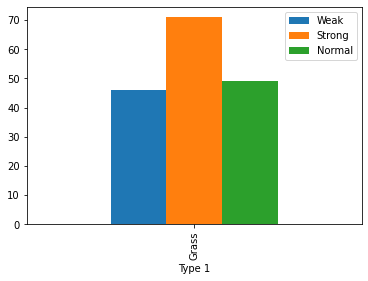

In [63]:
#visualisasi menggunakan bar plot

final_bulbasaur[['Weak', 'Strong', 'Normal']].plot(kind='bar');

##### Kesimpulan

- paling banyak pokemon lemah terhadap Bulbasaur dan evolusinya
- nilai netral sedikit lebih banyak terhadap nilai weak
- rata-rata ada 71 pokemon memiliki elemen yang lemah melawan elemen GRASS POISON
- rata-rata ada 46 pokemon memiliki elemen yang kuat melawan elemen GRASS POISON
- rata-rata ada 49 pokemon memiliki elemen netral melawan elemen GRASS POISON

#### 6. Finalisasi

langkah terakhir adalah membandingkan ketiga pokemon starter, sehingga didapat pokemon mana yang cocok dipilih sebagai starter

In [64]:
#concat ketiga df dalam satu dataframe

df_final = pd.concat([final_charmander, final_squirtle, final_bulbasaur])
df_final

,Total,Strong,Weak,Normal
Type 1,,,,
Fire,416.000000,35.666667,54.0,76.333333
Water,416.333333,33.000000,27.0,106.000000
Grass,416.000000,71.000000,46.0,49.000000


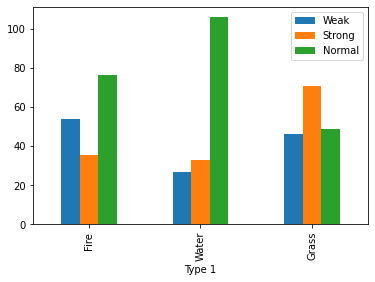

In [65]:
#visualisasikan df_final menggunakan plot bar

df_final[['Weak', 'Strong', 'Normal']].plot(kind='bar');

### Kesimpulan akhir

- dari bar plot, terlihat bahwa BULBASAUR memiliki nilai strong paling tinggi dibandingkan kedua pokemon lainya, ini menandakan bahwa elemen GRASS POISON sangat efektif utk melawan
pokemon-pokemon lainya di Generasi 1
- kedua, SQUIRTLE dengan type WATER nya juga bisa dipilih menjadi starter, dikarenakan hanya sedikit pokemon yang kuat melawan type WATER, 
- Charmander tidak direkomendasi untuk dipilih karena, banyak lawan yang kuat dengan elemen FIRE sehingga akan kesulitan untuk menamatkan gamenya
- jika diurutkan maka rekomendasi starter pokemon adalah :
    1. Bulbasaur
    2. Squirtle
    3. Charmander

NB :

- Hasil ini hanya untuk generasi 1, dan bisa saja charmander lebih kuat jika melawan pokemon generasi 2 atau seterusnya
- masih banyak faktor yang bisa menentukan, karena move atau stat dari pokemon juga berpengaruh

![caption](bulbasaur.png)